In [57]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# imputing missing values
import missingno as msno

# reading files from local system
from google.colab import files
uploaded = files.upload()
import io

# spliting datasets
from sklearn.model_selection import train_test_split

# getting dummy variables
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# standardizing dataset
from sklearn.preprocessing import StandardScaler


In [58]:
#Read csv file
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:,1].values
Y = dataset.iloc[:,-1].values

X = X.reshape(len(X),1)
Y = Y.reshape(len(Y),1)

In [59]:
#Feature Scaling
#Standardize X and Y columns
X_stand = StandardScaler()
Y_stand = StandardScaler()

X_new = X_stand.fit_transform(X)
Y_new = Y_stand.fit_transform(Y)

In [60]:
#fit dataset into SVR model
svr = SVR('rbf')
svr.fit(X_new, Y_new)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [61]:
#predict salary based on job level at 6.5
Y_pred = svr.predict(X_stand.transform([[6.5]]))
Y_stand.inverse_transform(Y_pred)

array([170370.0204065])

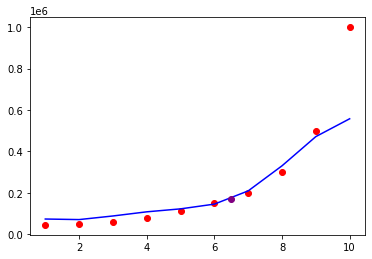

In [62]:
#visualize SVM model
fig, ax = plt.subplots()
ax.scatter(X, Y, color='red')
ax.plot(X_stand.inverse_transform(X_new), Y_stand.inverse_transform(svr.predict(X_new)), color='blue')
ax.plot(6.5, Y_stand.inverse_transform(Y_pred), 'ro', color = 'purple')

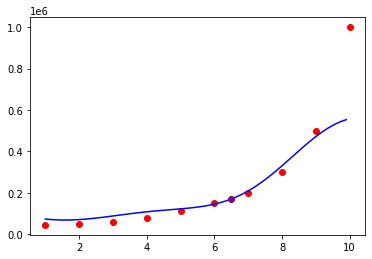

In [91]:
#visualize SVR results for higher resolution and smoother
X_smooth = np.arange(min(X), max(X), 0.1)
X_smooth = X_smooth.reshape(len(X_smooth),1)

fig, ax = plt.subplots()
ax.scatter(X, Y, color='red')
ax.plot(X_smooth, Y_stand.inverse_transform(svr.predict(X_stand.transform(X_smooth))), color='blue')
ax.plot(6.5, Y_stand.inverse_transform(Y_pred), 'ro', color = 'purple')
